<a href="https://colab.research.google.com/github/Arush9910/MNIST-/blob/main/MNIST_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
x_train = x_train / 255.0
x_test = x_test/255.0
print(x_test.shape)

(10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [ ]:
model = Sequential()
model.add(Dense(units = 128,input_shape = (784,), activation = 'relu'))
model.add(Dense(units = 128,input_shape = (784,), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10,input_shape = (784,), activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 512
epochs = 10
model.fit(x=x_train,y=y_train,batch_size = batch_size,epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7017 - loss: 1.0022
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9304 - loss: 0.2466
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9506 - loss: 0.1718
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9602 - loss: 0.1340
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9695 - loss: 0.1053
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9714 - loss: 0.0941
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9757 - loss: 0.0790
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9797 - loss: 0.0671
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9829 - loss: 0.0602
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9838 - loss: 0.0535


In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0856


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[5.2562302e-07 1.0388911e-06 2.1563586e-05 ... 9.9982595e-01
  1.8940645e-07 2.2988088e-06]
 [1.5907416e-08 3.0640818e-05 9.9996525e-01 ... 5.8538618e-10
  2.9070299e-07 7.3282867e-13]
 [4.1137291e-06 9.9478245e-01 4.7725061e-04 ... 2.8935811e-03
  7.2160689e-04 8.5871565e-05]
 ...
 [1.5518196e-10 1.1989577e-08 1.0703687e-09 ... 2.6251973e-07
  1.0311959e-07 1.9403253e-05]
 [1.6211066e-08 2.9868894e-09 1.6025029e-10 ... 5.5228644e-09
  1.1512813e-04 8.3186320e-09]
 [7.2511384e-08 5.6957425e-11 1.6650480e-09 ... 3.5821745e-11
  2.4944313e-10 2.9434875e-11]]
[7 2 1 ... 4 5 6]


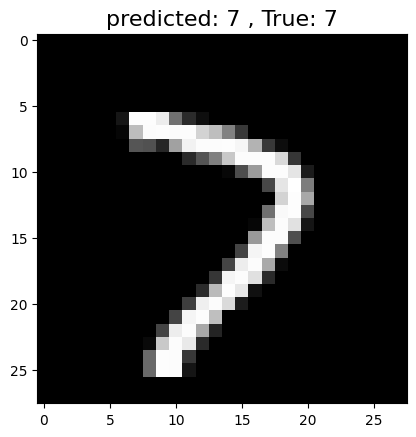

In [ ]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test,axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_classes = y_pred_classes[random_idx]

plt.title("predicted: {} , True: {}".format(y_sample_pred_classes,y_sample_true),fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap = 'gray')

Text(158.22222222222223, 0.5, 'True label')

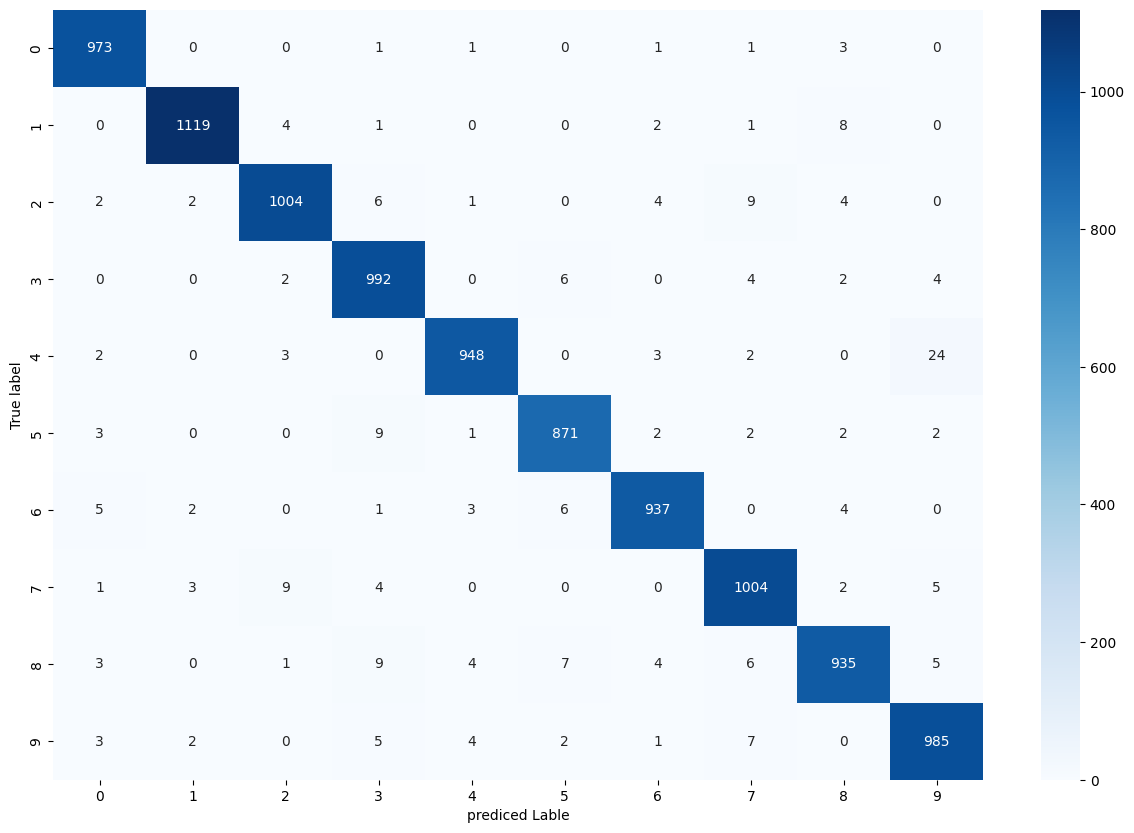

In [ ]:
confusion_mtx = confusion_matrix(y_true,y_pred_classes)

fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(confusion_mtx,annot=True,fmt = 'd',ax=ax,cmap = 'Blues')
ax.set_xlabel('prediced Lable')
ax.set_ylabel('True label')